In [2]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
sns.set_style("darkgrid")

In [4]:
#Import CSV
merged_csv = os.path.join("..", "data", "cleandata", "coll_n_weather_chris_stan_date_left_merge.csv")
csv = pd.read_csv(merged_csv, low_memory=False)

In [5]:
df = pd.DataFrame(csv)
df.columns

Index(['DATE', 'UNIX DATE', 'HOUR', 'DAY', 'MONTH', 'YEAR', 'BOROUGH',
       'DEATHS', 'INJURIES', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'Day', 'Detail', 'Moonphase', 'Summary', 'Sunrise', 'Sunset',
       'cloudCover', 'dewPoint', 'humidity', 'precipIntensity',
       'precipIntensityMax', 'precipProbability', 'pressure', 'temperatureMax',
       'temperatureMaxTime', 'temperatureMin', 'temperatureMinTime',
       'visibility', 'windGust', 'windGustTime', 'windSpeed'],
      dtype='object')

In [6]:
df.head(10)

,DATE,UNIX DATE,HOUR,DAY,MONTH,YEAR,BOROUGH,DEATHS,INJURIES,ZIP CODE,...,precipProbability,pressure,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,visibility,windGust,windGustTime,windSpeed
0,2018-12-30,1546171200,12,Sunday,12,2018,NaN,0.0,0,NaN,...,0.00,1023.42,38.91,1546146000,34.20,1546228800,9.87,5.93,1546149600,0.73
1,2018-12-30,1546171200,12,Sunday,12,2018,NaN,0.0,0,NaN,...,0.00,1023.42,38.91,1546146000,34.20,1546228800,9.87,5.93,1546149600,0.73
2,2018-12-28,1545955200,0,Friday,12,2018,NaN,0.0,0,NaN,...,1.00,1018.77,57.26,1546041600,42.23,1545973200,5.25,9.29,1546016400,3.85
3,2018-12-17,1545065100,16,Monday,12,2018,NaN,0.0,0,NaN,...,0.00,1007.31,45.88,1545066000,38.11,1545026400,10.00,16.37,1545080400,8.54
4,2018-12-11,1544533200,13,Tuesday,12,2018,NaN,0.0,0,NaN,...,0.00,1018.65,40.08,1544558400,25.13,1544526000,10.00,7.32,1544580000,1.49
5,2018-12-08,1544230260,0,Saturday,12,2018,NaN,0.0,1,NaN,...,0.00,1032.25,35.18,1544295600,22.82,1544270400,10.00,9.76,1544288400,4.30
6,2018-11-25,1543145400,11,Sunday,11,2018,NaN,0.0,0,NaN,...,1.00,1009.41,54.78,1543176000,45.63,1543150800,9.13,12.50,1543132800,5.48
7,2018-11-15,1542315600,21,Thursday,11,2018,NaN,0.0,0,NaN,...,0.53,1029.24,37.17,1542340800,29.84,1542319200,6.92,23.67,1542337200,8.43
8,2018-11-15,1542324900,23,Thursday,11,2018,NaN,0.0,0,NaN,...,0.53,1029.24,37.17,1542340800,29.84,1542319200,6.92,23.67,1542337200,8.43
9,2018-11-09,1541790900,19,Friday,11,2018,NaN,0.0,0,NaN,...,1.00,1021.58,50.97,1541790000,39.40,1541757600,8.57,10.05,1541815200,5.17


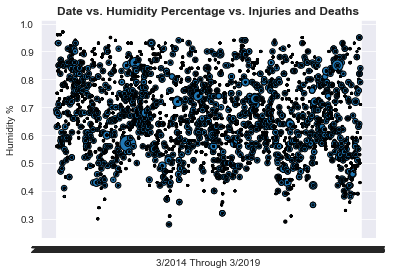

In [23]:
#Create Scatter Plot X=Date, Y=Humidity, s=injruries + Deaths
plt.scatter(df['DATE'], df['humidity'],s=df['INJURIES']+df['DEATHS']*15, edgecolor="black")
plt.title(f'Date vs. Humidity Percentage vs. Injuries and Deaths', fontweight="bold")
plt.xlabel('3/2014 Through 3/2019')
plt.ylabel('Humidity %')
#save figure
plt.savefig(os.path.join('..', 'reports', 'figures', 'humidityvsdeaths.png'))
#show figure
plt.show()

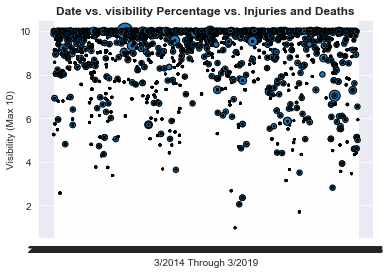

In [24]:
plt.scatter(df['DATE'], df['visibility'],s=df['INJURIES']+df['DEATHS']*15, edgecolor="black")
plt.title(f'Date vs. visibility Percentage vs. Injuries and Deaths', fontweight="bold")
plt.xlabel('3/2014 Through 3/2019')
plt.ylabel('Visibility (Max 10)')
#save figure
plt.savefig(os.path.join('..', 'reports', 'figures', 'visibilityvsdeaths.png'))
#show figure
plt.show()

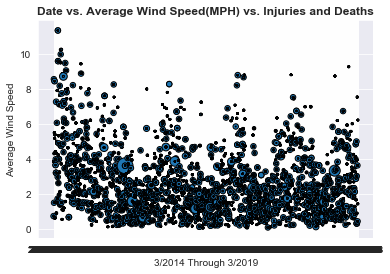

In [27]:
plt.scatter(df['DATE'], df['windSpeed'],s=df['INJURIES']+df['DEATHS']*15, edgecolor="black")
plt.title(f'Date vs. Average Wind Speed(MPH) vs. Injuries and Deaths', fontweight="bold")
plt.xlabel('3/2014 Through 3/2019')
plt.ylabel('Average Wind Speed')
#save figure
plt.savefig(os.path.join('..', 'reports', 'figures', 'windspeedvsdeaths.png'))
#show figure
plt.show()

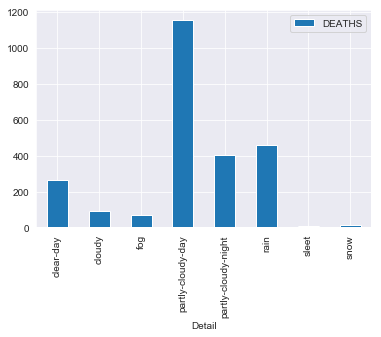

In [114]:
weather_total = df.groupby("Detail")['Detail', 'DEATHS'].sum()
weather_total.plot.bar()
plt.show()